In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import random

2022-09-06 10:20:55.595663: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-06 10:20:55.602631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 10:20:55.602651: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
#构建模拟数据
x=[i for i in range(1000)]   #特征
y=[15*x**2 + 3 + random.gauss(0,1) for x in x]  #标签

In [9]:
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

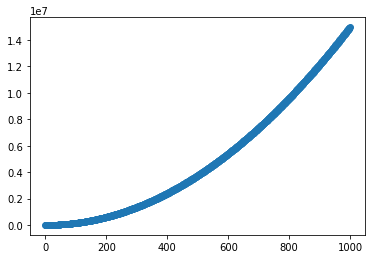

In [10]:
# 探索性分析
plt.scatter(x,y)

In [11]:
# 构建神经网络模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
#模型编译
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = 'mse',
             metrics = ['mse'])

2022-09-06 10:21:06.718279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 10:21:06.718341: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 10:21:06.718398: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-09-06 10:21:06.719148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [13]:
#训练模型，训练过程保存在history
history =model.fit(x,y,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 3ms/step - loss: 44889236570112.0000 - mse: 44889236570112.0000
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 44888913608704.0000 - mse: 44888913608704.0000
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 44888632590336.0000 - mse: 44888632590336.0000
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 44888393515008.0000 - mse: 44888393515008.0000
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 44888192188416.0000 - mse: 44888192188416.0000
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 44888007639040.0000 - mse: 44888007639040.0000
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 44887852449792.0000 - mse: 44887852449792.0000
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 44887705649152.0000 - mse: 44887705649152.0000
Epoch 9/1000
32/32 [============

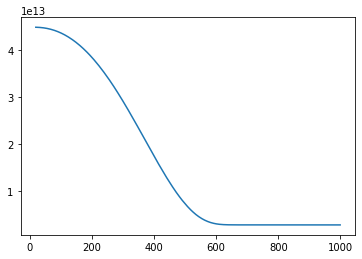

In [17]:
#可视化训练过程
plt.plot(history.epoch[20:],history.history.get('loss')[20:])